In [1]:
#Required libraries have been imported
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#All columns and rows observed
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);
#Number of numbers to show after comma
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [2]:
#Data set read
df_customer_data = pd.read_excel(r"C:\Users\lenovo\OneDrive\Masaüstü\online+retail+ii\online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [3]:
#Data set copied
df = df_customer_data.copy()

In [4]:
#First five observation units reached
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


In [5]:
#How many of which product are there?
df["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64

In [6]:
#Most ordered product
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [7]:
#Total number of invoices issued
df["Invoice"].nunique()

25900

In [89]:
#Total money earned per invoice
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [90]:
#Added "TotalPrice" variable to dataframe
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [10]:
#The total amount of money earned per invoice is shown
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139
536366,22
536367,279
536368,70
536369,18


In [11]:
#Most expensive products and sorted in descending order
df.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970,15098,United Kingdom,-38970
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836,NaN,United Kingdom,-17836
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888,NaN,United Kingdom,-16888
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16454,NaN,United Kingdom,-16454
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541,NaN,United Kingdom,-13541


In [12]:
#How many orders came from which countries? Categorical
df["Country"].value_counts().head()

Country
United Kingdom    495478
Germany             9495
France              8558
EIRE                8196
Spain               2533
Name: count, dtype: int64

In [13]:
#Which country earned how much?
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,8187806
Netherlands,284662
EIRE,263277
Germany,221698
France,197422


In [14]:
#The product with the most returns
returned = df[df["Invoice"].str.contains("C",na=False)]

In [15]:
returned.sort_values("Quantity", ascending = True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2,16446,United Kingdom,-168470
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1,12346,United Kingdom,-77184
4268,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0,15838,United Kingdom,-281
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2,15749,United Kingdom,-6539
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,2,15749,United Kingdom,-3700


In [16]:
#Values greater than zero were taken
df = df[df['Quantity'] > 0]
df = df[df['TotalPrice'] > 0]

In [17]:
#Are there any missing observations?
df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    132220
Country             0
TotalPrice          0
dtype: int64

In [18]:
#Missing observations were deleted
df.dropna(inplace = True)

In [19]:
#Checked again
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [20]:
#Size information
df.shape

(397885, 9)

In [21]:
#Descriptive statistics were looked at by determining the quarters ourselves
df.drop(columns=['InvoiceDate']).describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
Quantity,397885,13,179,1,1,1,1,2,6,12,12,24,36,120,80995
Price,397885,3,22,0,0,0,1,1,2,4,4,6,8,15,8143
Customer ID,397885,15294,1713,12346,12415,12627,12883,13969,15159,16795,17101,17725,17912,18211,18287
TotalPrice,397885,22,309,0,1,1,2,5,12,20,21,35,68,202,168470


In [22]:
#IQR is calculated considering the 1st and 3rd quarters and the lower and upper limits are determined here
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if (df[(df[feature] > upper) | (df[feature] < lower)] != pd.Timestamp(0)).any().any():
        print(feature,"yes") #aykırı
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0]) #aykırı gözlemlerin sayısı
    else:
        print(feature, "no") #değil

Quantity yes
962
Price yes
661
TotalPrice yes
903


In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397885 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397885 non-null  object        
 1   StockCode    397885 non-null  object        
 2   Description  397885 non-null  object        
 3   Quantity     397885 non-null  int64         
 4   InvoiceDate  397885 non-null  datetime64[ns]
 5   Price        397885 non-null  float64       
 6   Customer ID  397885 non-null  float64       
 7   Country      397885 non-null  object        
 8   TotalPrice   397885 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [25]:
df.shape

(397885, 9)

In [26]:
#First day of shopping
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [27]:
#Last day of shopping
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [28]:
#Today's date has been determined as the last shopping date
import datetime as dt
today_date = dt.datetime(2012,1,1)
today_date

datetime.datetime(2012, 1, 1, 0, 0)

In [29]:
#Last shopping dates were reached according to customer IDs
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:01:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [30]:
#recency value found
recency_df = (df.groupby("Customer ID").agg({"InvoiceDate": lambda x: (today_date- x.max()).days}))
recency_df.head()

,InvoiceDate
Customer ID,
12346,347
12347,24
12348,97
12349,40
12350,332


In [31]:
#InvoiceDate variable name changed to Recency
recency_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
recency_df.head()

,Recency
Customer ID,
12346,347
12347,24
12348,97
12349,40
12350,332


In [32]:
#Total number of invoices by CustomerID and InvoiceNo
frequency_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
frequency_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
12347       537626        31
            542237        29
            549222        24
            556201        18

In [33]:
#Invoice variable name changed to Frequency
freq_df = frequency_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [34]:
#monetary value found
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.rename(columns = {"TotalPrice": "Monetary"}, inplace = True)
monetary_df.head()

,Monetary
Customer ID,
12346,77184
12347,4310
12348,1797
12349,1758
12350,334


In [96]:
#Parameters are combined into a dataframe using the concat function
rfm_table = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm_table.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,1,77184
12347,24,7,4310
12348,97,4,1797
12349,40,1,1758
12350,332,1,334


In [36]:
#recency statistics
rfm_table.Recency.describe()

count   4338
mean     114
std      100
min       22
25%       39
50%       72
75%      164
max      395
Name: Recency, dtype: float64

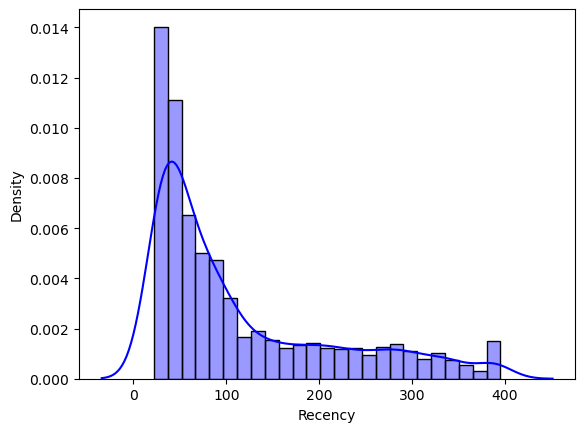

In [153]:
#recency scatter chart
import seaborn as sns
x = rfm_table['Recency']

ax = sns.histplot(
    x, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, color='blue',
)

In [38]:
#frequency descriptive statistics
rfm_table.Frequency.describe()

count   4338
mean       4
std        8
min        1
25%        1
50%        2
75%        5
max      209
Name: Frequency, dtype: float64

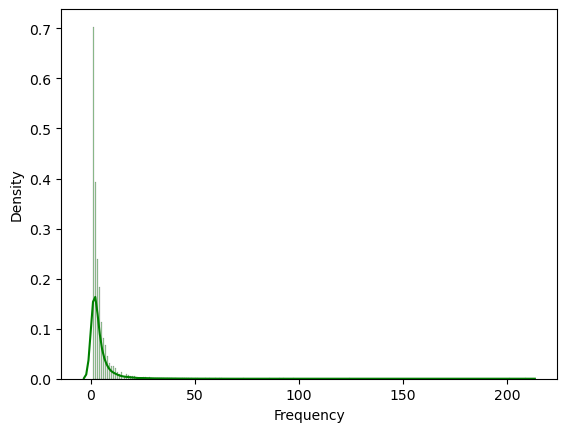

In [154]:
#frequency scatter chart
import seaborn as sns
x = rfm_table.query('Frequency < 1000')['Frequency']

ax = sns.histplot(
    x, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, color='green',
)

In [40]:
rfm_table.Monetary.describe()

count     4338
mean      2054
std       8989
min          4
25%        307
50%        674
75%       1662
max     280206
Name: Monetary, dtype: float64

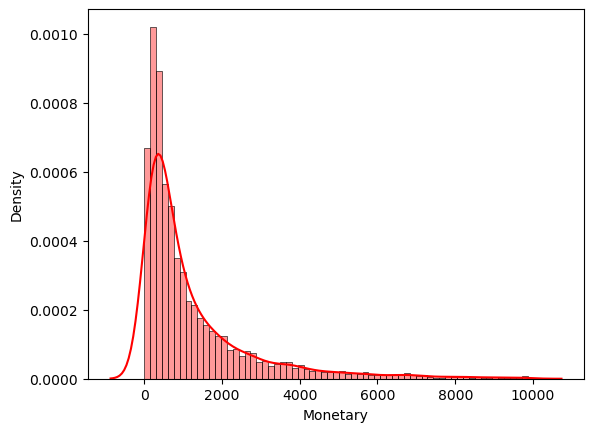

In [155]:
import seaborn as sns
x = rfm_table.query('Monetary < 10000')['Monetary']

ax = sns.histplot(
    x, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, color='red',
)

In [42]:
#Divided into four pieces using quarters
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 39.0, 0.5: 72.0, 0.75: 163.75},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.485,
  0.75: 1661.7400000000002}}

In [106]:
#Min Max normalization was done
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler((0,1))
x_scaled = min_max_scaler.fit_transform(rfm_table)
data_scaled = pd.DataFrame(x_scaled)

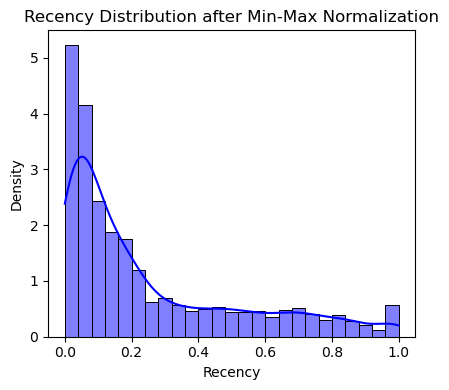

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Named dataframe again 
data_scaled.columns = ['Recency', 'Frequency', 'Monetary']

#Data distribution after data normalization for RFM
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(data_scaled['Recency'], kde=True, stat="density", color='blue')
plt.title('Recency Distribution after Min-Max Normalization')


plt.tight_layout()
plt.show()


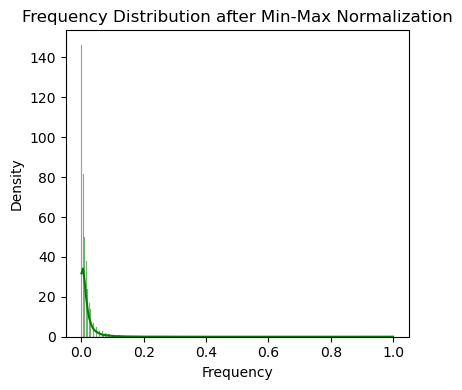

In [162]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 2)
sns.histplot(data_scaled['Frequency'], stat="density", kde=True, color='green')
plt.title('Frequency Distribution after Min-Max Normalization')

plt.tight_layout()
plt.show()

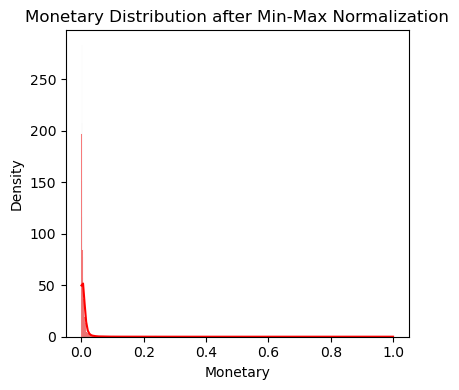

In [164]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 3)
ax = sns.histplot(data_scaled['Monetary'], stat="density", kde=True, color='red')
plt.title('Monetary Distribution after Min-Max Normalization')

plt.tight_layout()
plt.show()

In [43]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [44]:
#Added Recency, Frequency and Monetary values to dataframe
rfm_table["RecencyScore"] = rfm_table['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_table["FrequencyScore"] = rfm_table['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_table["MonetaryScore"] = rfm_table['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_table.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,347,1,77184,4,4,1
12347,24,7,4310,1,1,1
12348,97,4,1797,3,2,1
12349,40,1,1758,2,4,1
12350,332,1,334,4,4,3


In [45]:
#RFM values written side by side and added to the data frame
rfm_table['RFM_Group'] = rfm_table.RecencyScore.map(str) + rfm_table.FrequencyScore.map(str) + rfm_table.MonetaryScore.map(str)

In [46]:
#RFM values were collected and added to the data frame
rfm_table['RFM_Score'] = rfm_table[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].sum(axis = 1)
rfm_table.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Group,RFM_Score
Customer ID,,,,,,,,
12346,347,1,77184,4,4,1,441,9
12347,24,7,4310,1,1,1,111,3
12348,97,4,1797,3,2,1,321,6
12349,40,1,1758,2,4,1,241,7
12350,332,1,334,4,4,3,443,11


In [47]:
#Assign segment to each customer
Segment = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score = pd.qcut(rfm_table.RFM_Score, q = 4, labels = Segment)
rfm_table['Segment'] = Score.values
rfm_table.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Group,RFM_Score,Segment
Customer ID,,,,,,,,,
12346,347,1,77184,4,4,1,441,9,Silver
12347,24,7,4310,1,1,1,111,3,Platinum
12348,97,4,1797,3,2,1,321,6,Gold
12349,40,1,1758,2,4,1,241,7,Gold
12350,332,1,334,4,4,3,443,11,Bronze


In [48]:
#The best customers
rfm_table[rfm_table["RFM_Group"] == "111"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Group,RFM_Score,Segment
Customer ID,,,,,,,,,
12347,24,7,4310,1,1,1,111,3,Platinum
12362,25,10,5226,1,1,1,111,3,Platinum
12388,37,6,2781,1,1,1,111,3,Platinum
12417,25,9,3649,1,1,1,111,3,Platinum
12423,22,8,1859,1,1,1,111,3,Platinum


In [49]:
#The worst customers
rfm_table[rfm_table["RFM_Group"] == "444"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Group,RFM_Score,Segment
Customer ID,,,,,,,,,
12353,226,1,89,4,4,4,444,12,Bronze
12361,309,1,190,4,4,4,444,12,Bronze
12401,325,1,84,4,4,4,444,12,Bronze
12402,345,1,226,4,4,4,444,12,Bronze
12441,388,1,174,4,4,4,444,12,Bronze


In [50]:
#Obtained specific statistics from the RFM table grouped by "Segment" column
rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count","max"]).head(20)

Recency            Frequency            Monetary             
            mean count  max      mean count  max     mean count    max
Segment                                                               
Platinum      40  1188  156        10  1188  209     5656  1188 280206
Gold          81  1266  394         3  1266   34     1149  1266  44534
Silver       124   947  394         2   947    6      552   947  77184
Bronze       244   937  395         1   937    2      230   937    660

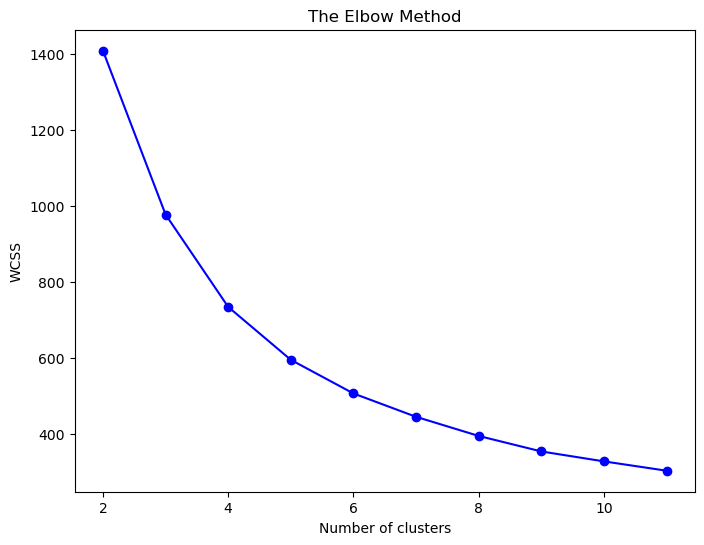

In [57]:
#elbow method
import warnings
warnings.filterwarnings('ignore')

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(8, 6))
wcss = [KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300).fit(data_scaled).inertia_ for i in range(2, 12)]
plt.plot(range(2, 12), wcss, marker='o', linestyle='-', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
#Performed K-Mean Clustering
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init =10,max_iter = 300)
kmeans.fit(data_scaled)
cluster = kmeans.predict(data_scaled)

In [54]:
#How many customers are in which cluster?
d_frame = pd.DataFrame(rfm_table)
d_frame['cluster_no'] = cluster
d_frame['cluster_no'].value_counts()

cluster_no
2    1223
3    1160
1     997
0     958
Name: count, dtype: int64

In [79]:
#cluster_no added to data frame without Segment column 
rfm_table_without_segment = d_frame.drop(columns=['Segment'])
rfm_table_without_segment.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Group,RFM_Score,cluster_no
Customer ID,,,,,,,,,
12346,347,1,77184,4,4,1,441,9,1
12347,24,7,4310,1,1,1,111,3,2
12348,97,4,1797,3,2,1,321,6,0
12349,40,1,1758,2,4,1,241,7,0
12350,332,1,334,4,4,3,443,11,1


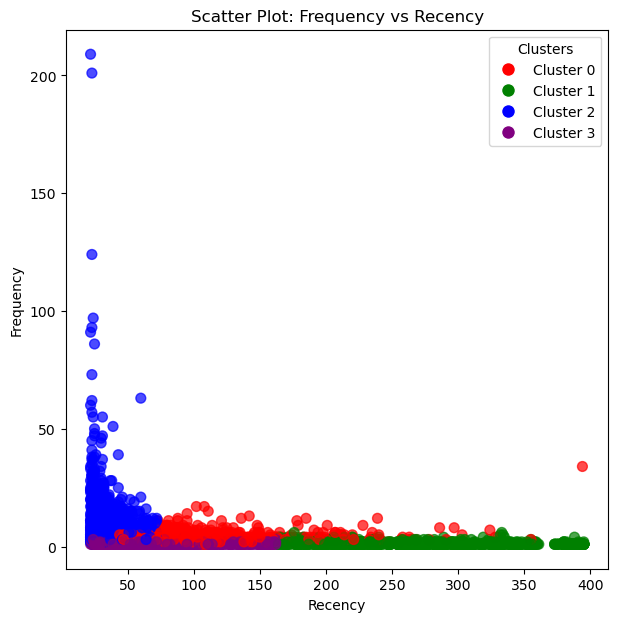

In [85]:
from matplotlib import pyplot as plt

# Assuming rfm_table_without_segment is DataFrame
plt.figure(figsize=(7, 7))

# Scatter Plot Frequency vs Recency
colors = ["red", "green", "blue", "purple"]  # Add more colors if needed
rfm_table_without_segment['Color'] = rfm_table_without_segment['cluster_no'].map(lambda p: colors[p])  # Assuming cluster column is named 'cluster_no'
scatter = plt.scatter(
    x=rfm_table_without_segment["Recency"],
    y=rfm_table_without_segment["Frequency"],
    c=rfm_table_without_segment["Color"],
    alpha=0.7,
    s=50  # Marker size
)

# Customize the plot
plt.title("Scatter Plot: Frequency vs Recency")
plt.xlabel("Recency")
plt.ylabel("Frequency")

# Add legend
legend_labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(handles=legend_elements, labels=legend_labels, title="Clusters")

plt.show()

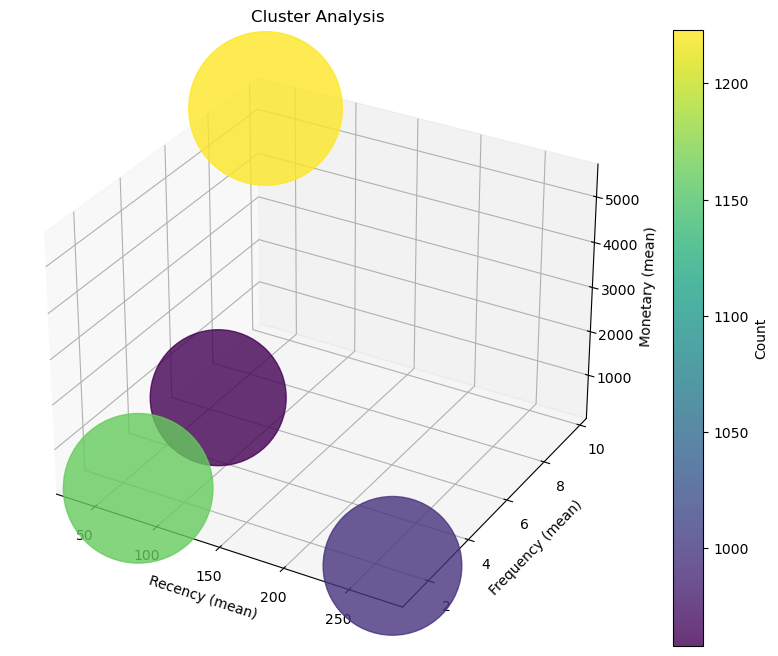

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_clustered is DataFrame
df_clustered = d_frame[["cluster_no", "Recency", "Frequency", "Monetary"]].groupby("cluster_no").agg(["mean", "count", "max"])

# Flatten the multi-level columns
df_clustered.columns = ['_'.join(col).strip() for col in df_clustered.columns.values]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_clustered['Recency_mean'], df_clustered['Frequency_mean'], df_clustered['Monetary_mean'],
                     c=df_clustered['Recency_count'], cmap='viridis', s=df_clustered['Recency_count']*10, alpha=0.8)

# Customize the plot
ax.set_xlabel('Recency (mean)')
ax.set_ylabel('Frequency (mean)')
ax.set_zlabel('Monetary (mean)')
ax.set_title('Cluster Analysis')

# Add color bar
cbar = fig.colorbar(scatter)
cbar.set_label('Count')

plt.show()


In [56]:
#Obtained specific statistics from the RFM table grouped by "cluster_no" column
d_frame[["cluster_no", "Recency","Frequency","Monetary"]].groupby("cluster_no").agg(["mean","count","max"]).head(20)

Recency            Frequency            Monetary             
              mean count  max      mean count  max     mean count    max
cluster_no                                                              
0               97   958  394         4   958   34     1572   958  44534
1              273   997  395         1   997    6      455   997  77184
2               36  1223   72        10  1223  209     5346  1223 280206
3               74  1160  163         1  1160    5      357  1160   1636

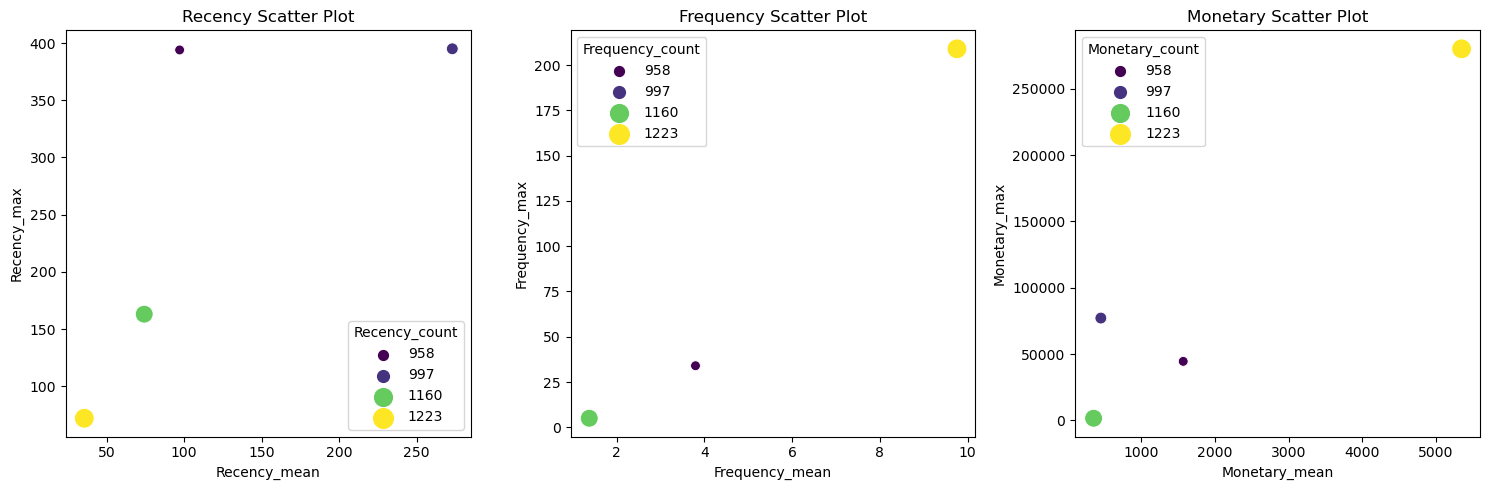

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clustered is DataFrame
df_clustered = d_frame[["cluster_no", "Recency", "Frequency", "Monetary"]].groupby("cluster_no").agg(["mean", "count", "max"])

# Flatten the multi-level columns
df_clustered.columns = ['_'.join(col).strip() for col in df_clustered.columns.values]

# Scatter plot
plt.figure(figsize=(15, 5))

# Scatter plot for Recency
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_clustered, x='Recency_mean', y='Recency_max', hue='Recency_count', palette='viridis', size='Recency_count', sizes=(50, 200))
plt.title('Recency Scatter Plot')

# Scatter plot for Frequency
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_clustered, x='Frequency_mean', y='Frequency_max', hue='Frequency_count', palette='viridis', size='Frequency_count', sizes=(50, 200))
plt.title('Frequency Scatter Plot')

# Scatter plot for Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_clustered, x='Monetary_mean', y='Monetary_max', hue='Monetary_count', palette='viridis', size='Monetary_count', sizes=(50, 200))
plt.title('Monetary Scatter Plot')

plt.tight_layout()
plt.show()
